# Introduction à Python

> présentée par Loïc Messal

## Les modules communautaires

Nous avons vu comment utiliser nos propres modules et ceux déjà inclus dans la librairie standard.

D'autres modules existent. Les développeurs qui les ont créés ont décidé de les partager à la communauté.

> Comment utiliser les modules communautaires ?

```py
# solution naive
```
Nous pouvons télécharger les fichiers un par un dans notre dossier de travail.

Bien entendu, cette solution s'avère vite pénible en pratique parce qu'il faut aller chercher ces fichiers sources pour chacun de nos projets.

```py
# solution améliorée
```
Si le code source du module est disponible, et qu'un fichier *setup.py* se trouve à la racine, il y a de fortes chances qu'il contienne les primitives pour l'installer.
Une fois le dossier récupéré, il suffit de lancer la commande `python setup.py install`.

```py
# solution élégante
```
Si le développeur a fait l'effort de mettre en place le fichier *setup.py*, alors il est fort à parier qu'il a propulsé son module sur le [*Python Package Index*](https://pypi.python.org/pypi).
*Pip* est un outil qui vient avec l'installation de l'interpréteur Python pour gérer ces modules. Pour installer un module communautaire disponible sur cet index, il suffit alors de lancer la commande `pip install <nom_du_module>` 

### matplotlib (visualisation de données)

> pour l'installer : `pip install matplotlib`

In [1]:
# configuration pour jupyter
%matplotlib inline

In [2]:
# génération de données
donnees = []
donnees.append({"x":0, "y":0})
donnees.append({"x":2, "y":1.1})
donnees.append({"x":4, "y":1.9})
donnees.append({"x":6, "y":2.8})
donnees.append({"x":8, "y":4.2})
donnees.append({"x":10, "y":5})

x = list(map(lambda donnee: donnee["x"], donnees))
y = list(map(lambda donnee: donnee["y"], donnees))

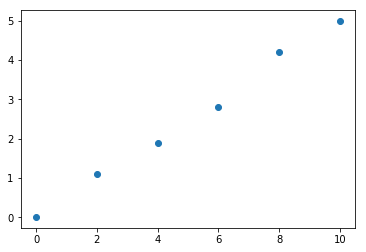

In [3]:
import matplotlib.pyplot

matplotlib.pyplot.scatter(x, y)  # affichage de points

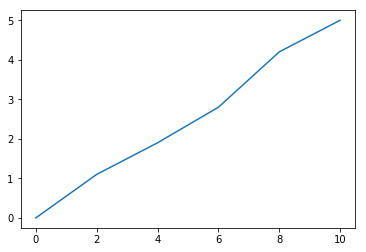

In [4]:
import matplotlib.pyplot

matplotlib.pyplot.plot(x, y)  # affichage de points reliés par un segment

[Plus de détails sur matplotlib ici](https://matplotlib.org/)

### numpy (calculs scientifiques)

> pour l'installer : `pip install numpy`

In [5]:
import numpy

x = numpy.array(x)
y = numpy.array(y)

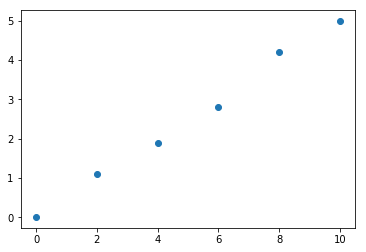

In [6]:
import matplotlib
import matplotlib.pyplot

matplotlib.pyplot.scatter(x, y)

`numpy` permet des opérations terme à terme sur les `array`.

In [7]:
x - y  # soustraction terme à terme

array([0. , 0.9, 2.1, 3.2, 3.8, 5. ])

In [8]:
x**2  # exponentiation terme à terme

array([  0,   4,  16,  36,  64, 100], dtype=int32)

In [9]:
x < 5  # test terme à terme

array([ True,  True,  True, False, False, False])

In [10]:
x.sum()  # somme sur tous les termes

30

In [11]:
x.cumsum()  # somme cumulée

array([ 0,  2,  6, 12, 20, 30], dtype=int32)

In [12]:
data = numpy.stack((x, y), axis=-1)  # empilement

In [13]:
data

array([[ 0. ,  0. ],
       [ 2. ,  1.1],
       [ 4. ,  1.9],
       [ 6. ,  2.8],
       [ 8. ,  4.2],
       [10. ,  5. ]])

In [14]:
data[3,1]

2.8

[Plus de détails sur numpy ici](http://www.numpy.org/)

### scikit (calculs scientifiques)

> pour l'installer : 
- `pip install scipy`
- `pip install sklearn`

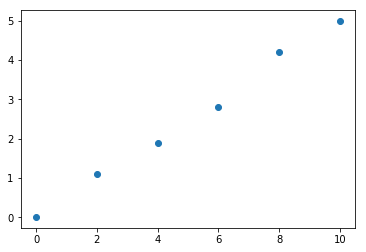

In [15]:
import matplotlib
import matplotlib.pyplot

matplotlib.pyplot.scatter(x, y)

Nous allons essayer d'estimer la droite qui passe par ces points à l'aide d'une régression linéaire.

In [16]:
from sklearn import linear_model

import numpy as np

regr = linear_model.LinearRegression()
regr.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# x doit être une matrice de taille [n_exemples, n_features] d'où
x[:, np.newaxis]

array([[ 0],
       [ 2],
       [ 4],
       [ 6],
       [ 8],
       [10]])

In [18]:
regr.predict(15)

array([7.52857143])

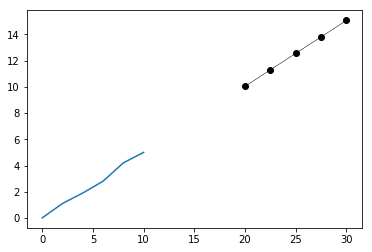

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x_cherche = np.linspace(20, 30, 5)  # Crée un array de 5 valeurs équitablement réparties entre les valeurs 20 et 30

plt.scatter(x_cherche, regr.predict(x_cherche[:, np.newaxis]), color="black")
plt.plot(x_cherche, regr.predict(x_cherche[:, np.newaxis]), color="black", linewidth=0.5)
plt.plot(x, y)
plt.show()

[Plus de détails sur scikit ici](http://scikit-learn.org/stable/#)

### Tensorflow (apprentissage profond - réseaux de neurones)

> pour l'installer : `pip install tensorflow`

<center>*Un réseau de neurones*</center>

<img src="assets/reseau_de_neurones.png">

<center>*Un neurone*</center>

<img src="assets/structure_d_un_neurone.png">

In [20]:
import tensorflow as tf
import random

# Parametres
learning_rate = 0.01
training_epochs = 1000
display_step = 100

# Entrées du graphe tensorflow
X = tf.placeholder("float")
Y = tf.placeholder("float")
n_samples = x.shape[0]

# Définitions des poids initiaux du modèle
W = tf.Variable(random.random(), name="weight")
b = tf.Variable(random.random(), name="bias")

# Construction d'un modèle linéaire
pred = tf.add(tf.multiply(X, W), b)

c:\users\loic\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [21]:
# Il ne reste plus qu'à définir notre stratégie d'apprentissage.

# Erreur moyenne quadratique (notre fonction coût à minimiser)
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / n_samples

# Optimisation par descente de gradient (notre façon de trouver comment modifier les paramètres du modèle)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialisation des variables (leur associe leur valeur par défaut)
init = tf.global_variables_initializer()

In [22]:
# Début de l'entraînement
with tf.Session() as sess:
    sess.run(init)

    # Parcours de toutes les données d'entraînement
    for epoch in range(training_epochs):
        for x_i, y_i in zip(x, y):
            sess.run(optimizer, feed_dict={X: x_i, Y: y_i})

        # Affiche un retour par pas de display_step epochs
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: x, Y:y})
            print("Epoch : {:04d}, coût = {:.9f}, W = {:.9f}, b = {:.9f}".format(epoch + 1, c, sess.run(W), sess.run(b)))

    print("Optimisation terminée!")
    training_cost = sess.run(cost, feed_dict={X: x, Y: y})
    W_estimated = sess.run(W)
    b_estimated = sess.run(b)
    print("Coût = {}, W = {}, b = {}".format(training_cost, W_estimated, b_estimated))

Epoch : 0100, coût = 0.079981446, W = 0.448706836, b = 0.427347004
Epoch : 0200, coût = 0.034415182, W = 0.474651337, b = 0.219275236
Epoch : 0300, coût = 0.021630257, W = 0.488371938, b = 0.109237544
Epoch : 0400, coût = 0.018032862, W = 0.495627999, b = 0.051044747
Epoch : 0500, coût = 0.017015299, W = 0.499465376, b = 0.020269798
Epoch : 0600, coût = 0.016724598, W = 0.501494706, b = 0.003994562
Epoch : 0700, coût = 0.016640080, W = 0.502567887, b = -0.004612437
Epoch : 0800, coût = 0.016614754, W = 0.503135502, b = -0.009164266
Epoch : 0900, coût = 0.016606774, W = 0.503435671, b = -0.011571440
Epoch : 1000, coût = 0.016604073, W = 0.503594398, b = -0.012844435
Optimisation terminée!
Coût = 0.016604073345661163, W = 0.5035943984985352, b = -0.012844434939324856


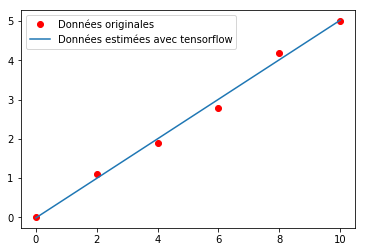

In [23]:
# Affichage de la prédiction
plt.plot(x, y, "ro", label="Données originales")
plt.plot(x, W_estimated * x + b_estimated, label="Données estimées avec tensorflow")
plt.legend()
plt.show()

[Plus de détails sur tensorflow ici](https://www.tensorflow.org/)

### keras (apprentissage profond - réseaux de neurones)

> pour l'installer : `pip install keras`

In [24]:
import numpy as np
np.random.seed(21) # for reproducibility

In [25]:
from keras.models import Sequential
from keras.layers import Dense

# Création du modèle
model = Sequential()
model.add(Dense(units=1, activation="relu", input_dim=1))  # Utilisation d'un seul neuronne
model.compile(loss="mean_squared_error", optimizer="sgd")  # Optimisation par descente de gradient stochastique

model.fit(x, y, epochs=1500, batch_size=10, verbose=0)

Using TensorFlow backend.


In [26]:
model.evaluate(x, y)  # évaluation de la précision du modèle

6/6 [==============================] - 0s 2ms/step


0.016499971970915794

In [27]:
model.predict([30])  # prédiction sur une valeur

array([[15.119682]], dtype=float32)

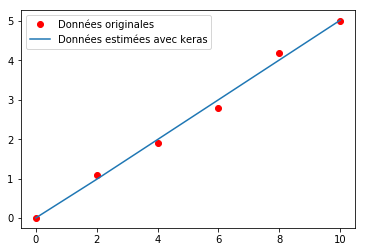

In [28]:
plt.plot(x, y, "ro", label="Données originales")
plt.plot(x, model.predict(x), label="Données estimées avec keras")
plt.legend()
plt.show()

In [29]:
for layer in model.layers:
    print(layer.get_weights()) # affichage des poids pour chaque couche

[array([[0.504986]], dtype=float32), array([-0.02989734], dtype=float32)]


#### Exemple sur une fonction non linéaire 

In [30]:
def une_fonction_inconnue(nb_points, b_min=-20, b_max=20):
    data_x = []
    data_y = []
    for p in np.linspace(b_min, b_max, nb_points):
        data_x.append(p)
        output = p**2 + random.uniform(-5, 5)  # génération de données un peu bruitées
        data_y.append(int(round(output, 0)))
    return (data_x, data_y)
        
x, y = une_fonction_inconnue(500)

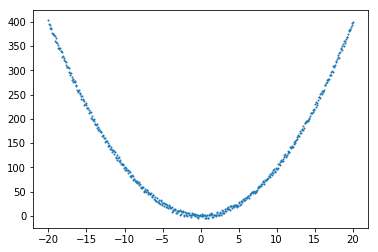

In [31]:
plt.scatter(x, y, s=1)
plt.show()

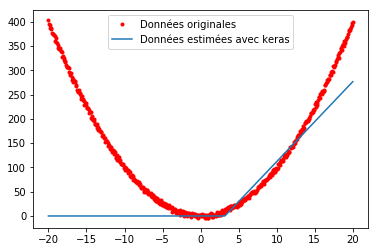

In [32]:
model.fit(x, y, epochs=10, batch_size=10, verbose=0)  # ré-entrainement du modèle

plt.plot(x, y, "r.", label="Données originales")
plt.plot(x, model.predict(x), label="Données estimées avec keras")
plt.legend()
plt.show()

On constate que le modèle linéaire avec un seul neurone est loin d'être suffisant. Nous voyons également l'allure de la fonction d'activation. Ajoutons des neurones à notre modèle.

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(units=1, activation="selu", input_dim=1))
model.add(Dense(units=64, activation="selu"))
model.add(Dropout(0.1))  # ignore aléatoirement 10% des neurones de la couche précédente à chaque époch (renforce la robustesse)
model.add(Dense(units=64, activation="sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation="elu"))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation="selu"))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="selu"))
model.compile(loss="mean_squared_error", optimizer="adam")

model.fit(x, y, epochs=300, batch_size=20, verbose=0)

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

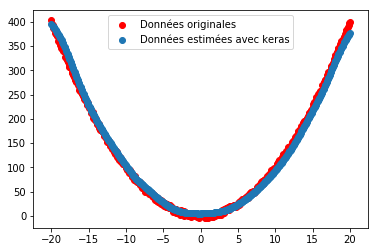

In [35]:
plt.scatter(x, y, color="r", label="Données originales")
plt.scatter(x, model.predict(x), label="Données estimées avec keras")
plt.legend()
plt.show()

Félicitations, votre modèle semble avoir correctement appris sur vos données.

> Votre modèle a-t-il vraiment réussi à retrouver la fonction x² ?

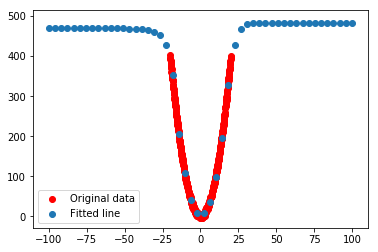

In [36]:
test_x = np.linspace(-100, 100, 50)
plt.scatter(x, y, color="r", label="Original data")
plt.scatter(test_x, model.predict(test_x), label="Fitted line")
plt.legend()
plt.show()

[Plus de détails sur keras ici](https://keras.io/)

### networkx (graphe)

> pour l'installer : `pip install networkx`

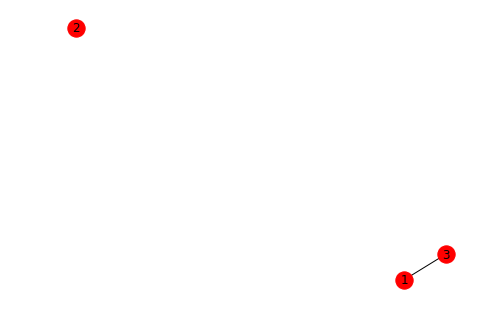

In [37]:
import networkx as nx

# Création du graphe
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_edge(1, 3)

# Affichage du graphe
nx.draw(G, with_labels=True)
plt.draw()

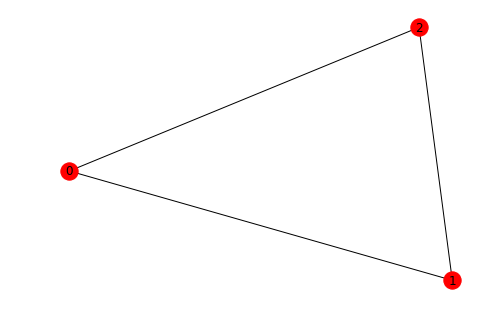

In [38]:
import networkx as nx
G=nx.complete_graph(3)

nx.draw(G, with_labels=True)
plt.draw()

> À partir du noeud 1, quel est le circuit à suivre pour passer sur chacune des routes une et une seule fois ?

In [39]:
list(nx.eulerian_circuit(G, source=1))

[(1, 2), (2, 0), (0, 1)]

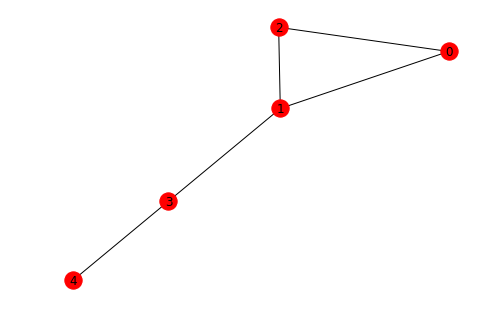

In [40]:
import networkx as nx

G=nx.complete_graph(3)
G.add_node(3)
G.add_node(4)
G.add_edge(1, 3)
G.add_edge(3, 4)

nx.draw(G, with_labels=True)
plt.draw()

> Quel est le plus court chemin pour rejoindre le noeud 4 à partir du noeud 0?

In [41]:
nx.dijkstra_path(G, 0, 4)

[0, 1, 3, 4]

[Plus de détails sur networkx ici](https://networkx.github.io/)

### pil (traitement d'images)

> pour l'installer : `pip install pillow`

In [42]:
from PIL import Image
image = Image.open("data/image/maison.jpg")

In [43]:
image.format

'JPEG'

In [44]:
image.mode

'RGB'

In [45]:
image.size

(300, 225)

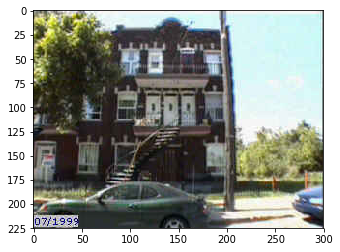

In [46]:
import matplotlib.pyplot
import numpy as np

matplotlib.pyplot.imshow(np.asarray(image))

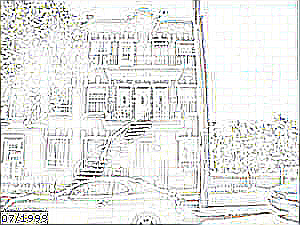

In [47]:
from PIL import ImageFilter

image.filter(ImageFilter.CONTOUR)

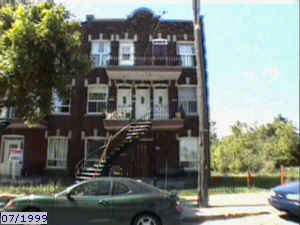

In [48]:
from PIL import ImageOps

ImageOps.autocontrast(image)

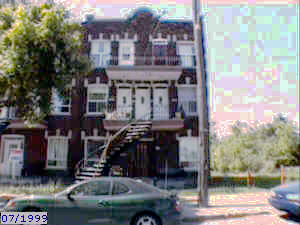

In [49]:
from PIL import ImageOps

ImageOps.equalize(image)

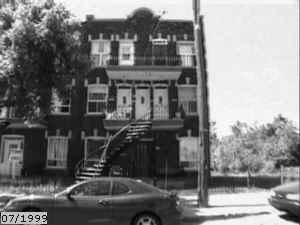

In [50]:
from PIL import ImageOps

ImageOps.grayscale(image)

[Plus de détails sur PIL ici](https://pillow.readthedocs.io/en/latest/)

### skimage (traitement d'images)

> pour l'installer : `pip install scikit-image`

#### Détection de voitures

> On souhaite avoir un détecteur de voiture par comparaison d'images.

In [51]:
from skimage.feature import match_template
from skimage import io
from skimage import color

image = io.imread("data/image/maison.jpg")
image = color.rgb2gray(image)

template = image[170:260, 50:160]

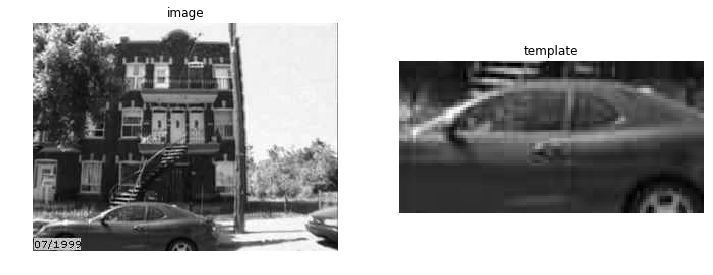

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax1, ax2 = axes.ravel()

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title("image")
ax1.set_axis_off()

ax2.imshow(template, cmap=plt.cm.gray)
ax2.set_title("template")
ax2.set_axis_off()

In [53]:
result = match_template(image, template)

# récupération des coordonnées de la meilleure correspondance
y, x = np.unravel_index(np.argmax(result), result.shape)  # argmax récupère le maximum global --> on obtient qu'un seul résultat

# highlight matched region
h_template, w_template = template.shape

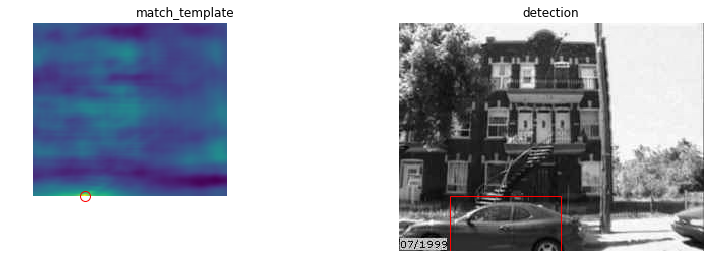

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)
ax1, ax2, = axes.ravel()

ax1.set_title("match_template")
ax1.imshow(result)
ax1.plot(x, y, "o", markeredgecolor="r", markerfacecolor="none", markersize=10) # highlight matched region
ax1.set_axis_off()

ax2.set_title("detection")
ax2.imshow(image, cmap=plt.cm.gray)
rect = plt.Rectangle((x, y), w_template, h_template, edgecolor="r", facecolor="none")
ax2.add_patch(rect)
ax2.set_axis_off()

plt.show()

#### segmentation d'images (utilisation de skimage & PIL)

In [55]:
import numpy as np

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage

from PIL import Image
from PIL import ImageFilter
from PIL import ImageOps

import matplotlib.pyplot as plt

In [56]:
# traitement rapide de l'image avec PIL
image = Image.open("data/image/maison.jpg")
image = image.filter(ImageFilter.CONTOUR)
image = ImageOps.grayscale(image)

image = np.asarray(image)  # conversion de l'image en array numpy (pour pouvoir l'utiliser avec le module skimage)

# génération de la carte de distance par rapport à l'arrière plan
distance = ndimage.distance_transform_edt(image)

# récupération des maxima locaux
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((4, 4)), labels=image)
markers, nb_objects = ndimage.label(local_maxi)
print("{} éléments trouvés".format(nb_objects))
labels = watershed(-distance, markers, mask=image)

1138 éléments trouvés


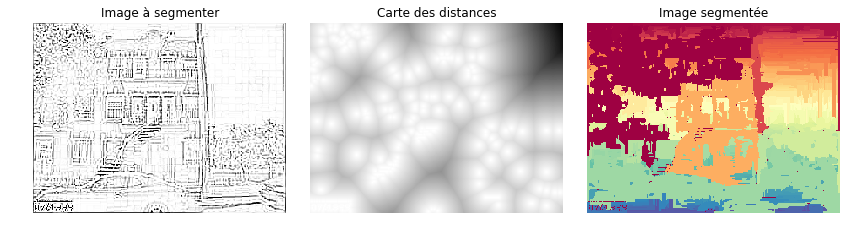

In [57]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation="nearest")
ax[0].set_title("Image à segmenter")
ax[0].set_axis_off()

ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation="nearest")
ax[1].set_title("Carte des distances")
ax[1].set_axis_off()

ax[2].imshow(labels, cmap=plt.cm.Spectral, interpolation="nearest")
ax[2].set_title("Image segmentée")
ax[2].set_axis_off()

fig.tight_layout()
plt.show()

In [58]:
from skimage.morphology import closing
from skimage.morphology import opening

filtered_labels_opening_closing = opening(closing(labels))
filtered_labels_closing_opening = closing(opening(labels))

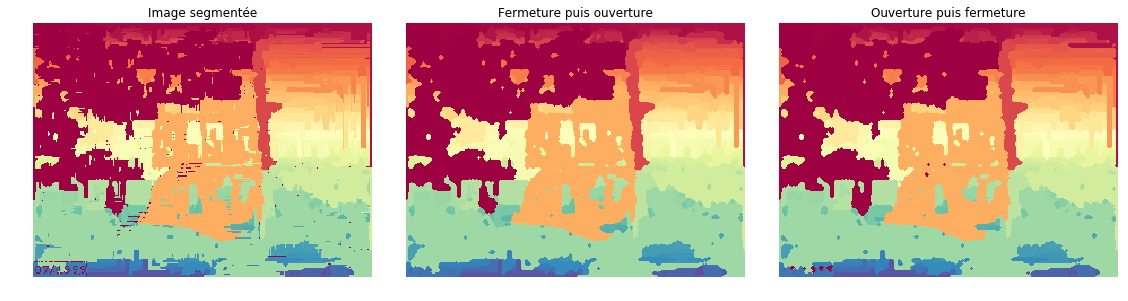

In [59]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(labels, cmap=plt.cm.Spectral, interpolation="nearest")
ax[0].set_title("Image segmentée")
ax[0].set_axis_off()

ax[1].imshow(filtered_labels_opening_closing, cmap=plt.cm.Spectral, interpolation="nearest")
ax[1].set_title("Fermeture puis ouverture")
ax[1].set_axis_off()

ax[2].imshow(filtered_labels_closing_opening, cmap=plt.cm.Spectral, interpolation="nearest")
ax[2].set_title("Ouverture puis fermeture")
ax[2].set_axis_off()

fig.tight_layout()
plt.show()

#### segmentation d'images (utilisation de skimage)

In [60]:
from scipy import ndimage

from skimage import io
from skimage.color import rgb2gray
from skimage.filters import rank
from skimage.morphology import watershed, disk

image = io.imread("data/image/maison.jpg")
image = rgb2gray(image)

# débruitage de l'image
denoised = rank.median(image, disk(2))

c:\users\loic\appdata\local\programs\python\python36\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


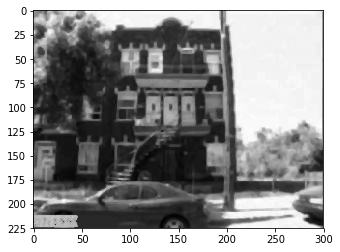

In [61]:
plt.imshow(np.asarray(denoised), cmap=plt.cm.gray)
plt.show()

26 régions trouvées


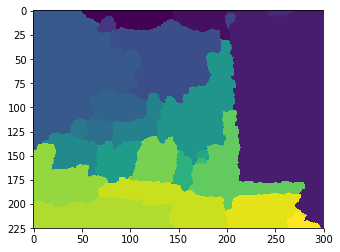

In [62]:
# trouve les régions continues (de faible gradient (moins de 8 ici)) --> markers 
# disk(5) est utilisé pour obtenir un gradient lissé
gradient = rank.gradient(denoised, disk(5))
markers = gradient < 8
markers, nb_regions = ndimage.label(markers)
print("{} régions trouvées".format(nb_regions))

# segmentation
labels = watershed(gradient, markers)
plt.imshow(np.asarray(labels))
plt.show()

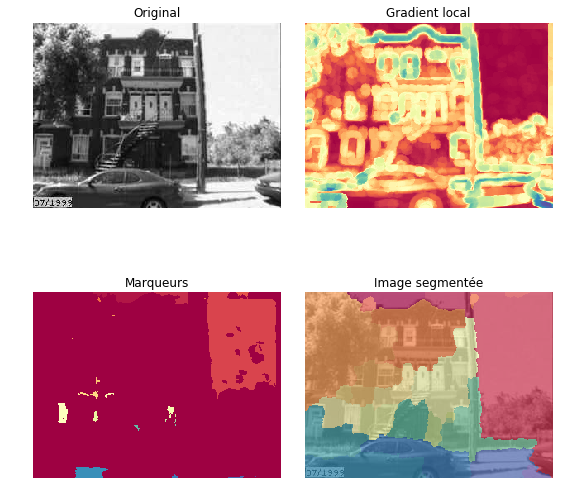

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation="nearest")
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.Spectral, interpolation="nearest")
ax[1].set_title("Gradient local")

ax[2].imshow(markers, cmap=plt.cm.Spectral, interpolation="nearest")
ax[2].set_title("Marqueurs")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation="nearest")
ax[3].imshow(labels, cmap=plt.cm.Spectral, interpolation="nearest", alpha=.7)
ax[3].set_title("Image segmentée")

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

[Plus de détails sur skimage ici](http://scikit-image.org/)

### opencv (traitement d'images)

> pour l'installer : `pip install opencv-contrib-python`

In [64]:
import cv2
import numpy as np

img = cv2.imread("data/image/maison.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

> On souhaite détecter automatiquement les points d'intérêts sur notre image

In [65]:
sift = cv2.xfeatures2d.SIFT_create()
(kp, descs1) = sift.detectAndCompute(img, None)
img=cv2.drawKeypoints(gray,kp,img)

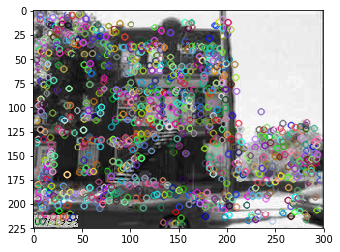

In [66]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

[Plus de détails sur opencv ici](https://opencv.org/opencv-3-0.html)

### pandas (analyse de données)

> pour l'installer : `pip install pandas`

In [67]:
import pandas as pd
data = pd.read_csv("data/fichiers/liste_d_employes.csv", encoding="utf8")

In [68]:
data

,nom,prenom,employeur,annee_de_naissance
0,Messal,Loïc,Jakarto,1994
1,Lassem,Ciol,Otrakaj,2001
2,Alssem,Icol,Torakaj,1998
3,Inex,Istant,Karotaj,1998


In [69]:
data.sort_values(by="annee_de_naissance")

,nom,prenom,employeur,annee_de_naissance
0,Messal,Loïc,Jakarto,1994
2,Alssem,Icol,Torakaj,1998
3,Inex,Istant,Karotaj,1998
1,Lassem,Ciol,Otrakaj,2001


In [70]:
data.groupby("annee_de_naissance").size()

annee_de_naissance
1994    1
1998    2
2001    1
dtype: int64

On dispose d'un fichier `description.csv` contenant la description pour certains employés. On souhaite fusionner ces deux jeux de données.

In [71]:
description = pd.read_csv("data/fichiers/description.csv", encoding="utf8")
description

,nom,prenom,description
0,Alssem,Icol,Un gentil employé qui fait des ravages en prov...
1,Lassem,Ciol,Cet employé qui découvre le monde
2,Messal,Loïc,Un nouvel employé polyvalent


In [72]:
pd.merge(data, description, on="nom")

,nom,prenom_x,employeur,annee_de_naissance,prenom_y,description
0,Messal,Loïc,Jakarto,1994,Loïc,Un nouvel employé polyvalent
1,Lassem,Ciol,Otrakaj,2001,Ciol,Cet employé qui découvre le monde
2,Alssem,Icol,Torakaj,1998,Icol,Un gentil employé qui fait des ravages en prov...


Ici, nous avons deux problèmes : 
- On a encore perdu Inex Istant, parce qu'il n'a pas de description.
- Nous avons fusionné qu'avec les nom, donc la colonne prénom du fichier `description.csv` est ajoutée. Nous avons donc cette colonne en double. Nous pouvons également utiliser cette colonne *prénom* pour renforcer notre fusion puisque les noms ne sont généralement pas des clés uniques, alors que le couple (nom, prenom) a plus de chance de l'être.

In [73]:
pd.merge(data, description, on=["nom", "prenom"], how="outer")

,nom,prenom,employeur,annee_de_naissance,description
0,Messal,Loïc,Jakarto,1994,Un nouvel employé polyvalent
1,Lassem,Ciol,Otrakaj,2001,Cet employé qui découvre le monde
2,Alssem,Icol,Torakaj,1998,Un gentil employé qui fait des ravages en prov...
3,Inex,Istant,Karotaj,1998,NaN


[Plus de détails sur pandas ici](https://pandas.pydata.org/)

### nltk (traitement du langage naturel)

> pour l'installer : `pip install nltk`

In [74]:
import nltk

#### distribution de mots

> On aimerait analyser les mots qui se retrouvent le plus dans l'ensemble des descriptions.

In [75]:
# concaténation de toutes les lignes de la colonne description avec pandas
toute_les_descriptions = description.description.str.cat(sep=" ")  
toute_les_descriptions

"Un gentil employé qui fait des ravages en provenance de l'ancien monde. Cet employé qui découvre le monde Un nouvel employé polyvalent"

In [76]:
# séparer la ponctuation autre que les points
tokenized = nltk.word_tokenize(toute_les_descriptions, language="french")
tokenized

['Un',
 'gentil',
 'employé',
 'qui',
 'fait',
 'des',
 'ravages',
 'en',
 'provenance',
 'de',
 "l'ancien",
 'monde',
 '.',
 'Cet',
 'employé',
 'qui',
 'découvre',
 'le',
 'monde',
 'Un',
 'nouvel',
 'employé',
 'polyvalent']

In [77]:
frequency_distribution = nltk.FreqDist(tokenized)

In [78]:
# le mot qui revient le plus souvent
frequency_distribution.max()

'employé'

In [79]:
frequency_distribution.most_common(2)  # les n-mots qui reviennent le plus souvent

[('employé', 3), ('Un', 2)]

#### la grammaire

> On souhaite maintenant extraire tous les adjectifs utilisés dans les descriptions (cela pourrait servir à détecter l'émotivité de nos employés, en supposant qu'il s'agisse d'une auto-description).

Ce problème parait simple et stupide. Mais l'ordinateur connaît-il la notion d'adjectif ? C'est ici que le traitement du langage naturel intervient.

In [80]:
# un exemple
mots = "The black cat is sleeping on the sofa.".split()
nltk.pos_tag(mots)  # applique un tag à chaque mot

[('The', 'DT'),
 ('black', 'JJ'),
 ('cat', 'NN'),
 ('is', 'VBZ'),
 ('sleeping', 'VBG'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('sofa.', 'NN')]

- DT - déterminant
- JJ - adjectif
- NN - nom
- VBZ - verbe à la troisième personne du singulier
- VBG - verbe au gérondif
- IN - préposition

In [81]:
# sur nos descriptions
nltk.pos_tag(tokenized)

[('Un', 'NNP'),
 ('gentil', 'NN'),
 ('employé', 'NN'),
 ('qui', 'JJ'),
 ('fait', 'NN'),
 ('des', 'NNS'),
 ('ravages', 'VBP'),
 ('en', 'JJ'),
 ('provenance', 'NN'),
 ('de', 'IN'),
 ("l'ancien", 'FW'),
 ('monde', 'NN'),
 ('.', '.'),
 ('Cet', 'NNP'),
 ('employé', 'JJ'),
 ('qui', 'NN'),
 ('découvre', 'NN'),
 ('le', 'NN'),
 ('monde', 'NN'),
 ('Un', 'NNP'),
 ('nouvel', 'NN'),
 ('employé', 'NN'),
 ('polyvalent', 'NN')]

Note : l'utilisation d'un modèle de grammaire est spécifique à une langue donnée.

nltk permet de réentraîner un modèle de grammaire à partir d'un jeu de données annoté. 

J'ai récupéré la version lite d'[un corpus d'un laboratoire de langue de l'Université Paris Diderot](http://ftb.linguist.univ-paris-diderot.fr/telecharger.php), que j'ai annoté pour intégrer les mots suivants : 
- Cet
- gentil
- employé
- fait
- ravages
- monde
- employé
- nouvel
- provenance
- l'ancien	
- découvre	
- polyvalent


In [82]:
# Le jeu de données est au format conll. nltk dispose d'un lecteur pour ce format de fichiers.

from nltk.corpus import ConllCorpusReader
colonnes_considerees = ["ignore", "words", "ignore", "pos", "ignore", "ignore", "ignore", "ignore", "ignore", "ignore"]
un_corpus_francais = ConllCorpusReader("data/texte/", ".*.conll", colonnes_considerees)

In [83]:
un_corpus_francais.tagged_sents()

[[('Cet', 'D'), ('gentil', 'A'), ('employé', 'N'), ('fait', 'V'), ('ravages', 'N'), ('monde', 'N'), ('employé', 'N'), ('nouvel', 'A'), ('provenance', 'N'), ("l'ancien", 'N'), ('découvre', 'V'), ('polyvalent', 'A')], [('Baisse', 'N'), ('des', 'P+D'), ('prix', 'N'), ('en', 'P'), ('Grande', 'A'), ('-', 'PONCT'), ('Bretagne', 'N'), (':', 'PONCT'), ('en', 'P'), ('novembre', 'N'), (',', 'PONCT'), ('les', 'D'), ('prix', 'N'), ('ont', 'V'), ('baissé', 'V'), ('de', 'P'), ('0', 'D'), (',', 'PONCT'), ('1', 'D'), ('%', 'N'), (',', 'PONCT'), ('annonce', 'V'), ("l'", 'D'), ('office', 'N'), ('des', 'P+D'), ('statistiques', 'N'), ('le', 'D'), ('11', 'A'), ('décembre', 'N'), ('.', 'PONCT')], ...]

In [84]:
# Entraînement du modèle de grammaire
tagger = nltk.UnigramTagger(un_corpus_francais.tagged_sents())  
# UnigramTagger considère le tag le plus fréquent pour un mot donné

In [85]:
tagged = set(tagger.tag(tokenized))
tagged

{('.', 'PONCT'),
 ('Cet', 'D'),
 ('Un', 'D'),
 ('de', 'P'),
 ('des', 'P+D'),
 ('découvre', 'V'),
 ('employé', 'N'),
 ('en', 'P'),
 ('fait', 'V'),
 ('gentil', 'A'),
 ("l'ancien", 'N'),
 ('le', 'D'),
 ('monde', 'N'),
 ('nouvel', 'A'),
 ('polyvalent', 'A'),
 ('provenance', 'N'),
 ('qui', 'PRO'),
 ('ravages', 'N')}

In [86]:
# récupération des adjectifs décrivant nos employés
list(filter(lambda x: x[1]=="A", tagged))

[('polyvalent', 'A'), ('gentil', 'A'), ('nouvel', 'A')]

#### classification de texte

> Nous aimerions bien créer un bot pour trier nos courriels selon si le contenu concerne les affaires de JLR ou plutôt celles de Jakarto.

Pour cela, nous allons entraîner un classifieur à partir de mots clés associés à ces entreprises.

In [87]:
jlr_mots_cles = pd.read_csv("data/texte/JLR_mots_cles.txt", header=None, encoding="utf8")
jakarto_mots_cles = pd.read_csv("data/texte/Jakarto_mots_cles.txt", header=None, encoding="utf8")

In [88]:
jakarto_mots_cles

,0
0,acquisition
1,traitement
2,capture
3,précision
4,lidar
5,technologie
6,cartes
7,mapping
8,capteurs
9,radar


In [89]:
# On construit une table d'association
labeled_names = []

for mot in jakarto_mots_cles.itertuples():
    labeled_names.append((mot[1], "Jakarto"))
    
for mot in jlr_mots_cles.itertuples():
    labeled_names.append((mot[1], "JLR"))

In [90]:
labeled_names

[('acquisition', 'Jakarto'),
 ('traitement', 'Jakarto'),
 ('capture', 'Jakarto'),
 ('précision', 'Jakarto'),
 ('lidar', 'Jakarto'),
 ('technologie', 'Jakarto'),
 ('cartes', 'Jakarto'),
 ('mapping', 'Jakarto'),
 ('capteurs', 'Jakarto'),
 ('radar', 'Jakarto'),
 ('laser', 'Jakarto'),
 ('detection', 'Jakarto'),
 ('application', 'Jakarto'),
 ('3d', 'Jakarto'),
 ('immobilier', 'JLR'),
 ('investissement', 'JLR'),
 ('investir', 'JLR'),
 ('investissement', 'JLR'),
 ('agent', 'JLR'),
 ('logement', 'JLR'),
 ('chasseur', 'JLR'),
 ('immobilier locatif', 'JLR'),
 ('investir', 'JLR'),
 ('locatif', 'JLR'),
 ('rentier', 'JLR'),
 ('rentier', 'JLR'),
 ('investir', 'JLR'),
 ('documentaire', 'JLR'),
 ('maison', 'JLR'),
 ('devenir', 'JLR'),
 ('riche', 'JLR'),
 ('appartement', 'JLR'),
 ('gagner', 'JLR'),
 ('argent', 'JLR'),
 ('societe', 'JLR'),
 ('enquete', 'JLR'),
 ('argent', 'JLR'),
 ('indépendance', 'JLR'),
 ('financière', 'JLR'),
 ('reportage', 'JLR'),
 ('locatif', 'JLR'),
 ('investissement', 'JLR'),
 ('

In [91]:
import random

random.seed(2024)  # pour la reproductibilité

In [92]:
random.shuffle(labeled_names)  # mélange la liste
labeled_names

[('capteurs', 'Jakarto'),
 ('acquisition', 'Jakarto'),
 ('mapping', 'Jakarto'),
 ('rentier', 'JLR'),
 ('locatif', 'JLR'),
 ('capture', 'Jakarto'),
 ('radar', 'Jakarto'),
 ('maison', 'JLR'),
 ('laser', 'Jakarto'),
 ('propriétaire', 'JLR'),
 ('enquete', 'JLR'),
 ('agent', 'JLR'),
 ('financière', 'JLR'),
 ('technologie', 'Jakarto'),
 ('rentable', 'JLR'),
 ('devenir', 'JLR'),
 ('précision', 'Jakarto'),
 ('documentaire', 'JLR'),
 ('constructions', 'JLR'),
 ('ittinerance', 'JLR'),
 ('traitement', 'Jakarto'),
 ('investissement', 'JLR'),
 ('cartes', 'Jakarto'),
 ('investissement', 'JLR'),
 ('gagner', 'JLR'),
 ('chasseur', 'JLR'),
 ('laurentide', 'JLR'),
 ('immobilier', 'JLR'),
 ('locatif', 'JLR'),
 ('rentier', 'JLR'),
 ('reportage', 'JLR'),
 ('argent', 'JLR'),
 ('lidar', 'Jakarto'),
 ('immobilier locatif', 'JLR'),
 ('france', 'JLR'),
 ('naviguez', 'JLR'),
 ('3d', 'Jakarto'),
 ('argent', 'JLR'),
 ('locataire', 'JLR'),
 ('investir', 'JLR'),
 ('appartement', 'JLR'),
 ('locatif', 'JLR'),
 ('invest

Le classifieur utilise l'apprentissage machine (machine learning). Il doit donc apprendre sur des caractéristiques définies.

In [93]:
# Considérons comme caractéristique la dernière lettre des mots
def naive_features(word):
    return {"last_letter": word[-1]}

In [94]:
# construisons notre jeu de caractéristiques
featuresets = [(naive_features(n), categorie) for (n, categorie) in labeled_names]

In [95]:
featuresets[:5]

[({'last_letter': 's'}, 'Jakarto'),
 ({'last_letter': 'n'}, 'Jakarto'),
 ({'last_letter': 'g'}, 'Jakarto'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 'f'}, 'JLR')]

In [96]:
# divisons le jeu de caractéristiques en deux jeux: 
# un d'entraînement, et un de test (pour valider la pertinence de l'apprentissage)
ratio = 0.7
index_ratio = round(ratio * len(labeled_names))
train_set, test_set = featuresets[:index_ratio], featuresets[index_ratio:]

In [97]:
train_set

[({'last_letter': 's'}, 'Jakarto'),
 ({'last_letter': 'n'}, 'Jakarto'),
 ({'last_letter': 'g'}, 'Jakarto'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 'f'}, 'JLR'),
 ({'last_letter': 'e'}, 'Jakarto'),
 ({'last_letter': 'r'}, 'Jakarto'),
 ({'last_letter': 'n'}, 'JLR'),
 ({'last_letter': 'r'}, 'Jakarto'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 't'}, 'JLR'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 'e'}, 'Jakarto'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 'n'}, 'Jakarto'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 's'}, 'JLR'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 't'}, 'Jakarto'),
 ({'last_letter': 't'}, 'JLR'),
 ({'last_letter': 's'}, 'Jakarto'),
 ({'last_letter': 't'}, 'JLR'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 'f'}, 'JLR'),
 ({'last_letter': 'r'}, 'JLR'),


In [98]:
test_set

[({'last_letter': 'd'}, 'Jakarto'),
 ({'last_letter': 't'}, 'JLR'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 't'}, 'JLR'),
 ({'last_letter': 'f'}, 'JLR'),
 ({'last_letter': 't'}, 'JLR'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 'r'}, 'JLR'),
 ({'last_letter': 'n'}, 'Jakarto'),
 ({'last_letter': 't'}, 'JLR'),
 ({'last_letter': 'e'}, 'JLR'),
 ({'last_letter': 'n'}, 'JLR'),
 ({'last_letter': 'n'}, 'Jakarto'),
 ({'last_letter': 'e'}, 'JLR')]

In [99]:
classifier = nltk.NaiveBayesClassifier.train(train_set)  # entraînement du classifieur

In [100]:
nltk.classify.accuracy(classifier, test_set)

0.875

Notre classifieur a un score de 87.5% bonnes classifications pour notre jeu test.

In [101]:
classifier.classify(naive_features("acquisition"))

'Jakarto'

In [102]:
classifier.classify(naive_features("precision"))

'Jakarto'

In [103]:
classifier.classify(naive_features("la plus vieille entreprise"))

'JLR'

In [104]:
classifier.classify(naive_features("la meilleure entreprise"))

'JLR'

In [105]:
classifier.classify(naive_features("celle qui a un super projet"))

'JLR'

> On espérait trouver Jakarto ici ! Ré-entrainons notre classifieur avec des features plus réalistes !

In [106]:
def features_avancees(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in "abcdefghijklmnopqrstuvwxyz":
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

In [107]:
featuresets_avance = [(features_avancees(n), categorie) for (n, categorie) in labeled_names]

In [108]:
ratio = 0.7
index_ratio = round(ratio * len(labeled_names))
train_set_avance, test_set_avance = featuresets_avance[:index_ratio], featuresets_avance[index_ratio:]

In [109]:
classifier_avance = nltk.NaiveBayesClassifier.train(train_set_avance)

In [110]:
classifier_avance.classify(features_avancees("precision"))

'Jakarto'

In [111]:
classifier_avance.classify(features_avancees("forts"))

'JLR'

In [112]:
classifier_avance.classify(features_avancees("la plus vieille entreprise"))

'JLR'

In [113]:
classifier_avance.classify(features_avancees("la meilleure entreprise"))

'Jakarto'

In [114]:
classifier_avance.classify(features_avancees("celle qui a un super projet"))

'Jakarto'

In [115]:
classifier_avance.classify(features_avancees("les plus beaux"))

'Jakarto'

In [116]:
classifier_avance.classify(features_avancees("les meilleurs"))

'Jakarto'

In [117]:
classifier_avance.classify(features_avancees("cédric"))

'Jakarto'

In [118]:
classifier_avance.classify(features_avancees("thierry"))

'Jakarto'

In [119]:
classifier_avance.classify(features_avancees("loic"))

'Jakarto'

In [120]:
classifier_avance.classify(features_avancees("sandro"))

'Jakarto'

In [121]:
classifier_avance.classify(features_avancees("félix"))

'JLR'

In [122]:
classifier_avance.classify(features_avancees("joanie"))

'JLR'

In [123]:
classifier_avance.classify(features_avancees("laurence"))

'JLR'

In [124]:
classifier_avance.classify(features_avancees("charles"))

'Jakarto'

> Est-ce un signe du destin? 

[Plus de détails sur nltk ici](https://www.nltk.org/)

[Prochain chapitre : Des outils pour devenir actif](11_Des_outils.ipynb)